In [65]:
using BSON
using BSON: @save, @load
using Flux
using Plots

In [66]:
include("src/NN_Retrainer.jl")

Main.NN_Retrainer

In [67]:
NN_Retrainer.main(16.0, 2000000, 0.0001, 10000)

///////////////////////////////////////////////////////////////////////////////
                                Retrainer
///////////////////////////////////////////////////////////////////////////////
    
Neural Network would be changed from:
File: model-iter-101.bson
Activations: ["identity", "relu", "relu", "identity"]
Structure: [8, 30, 30, 30, 1]
Bias: false
Float64: true
To:
Saved to file: output_model.bson
Activations: ["identity", "relu", "identity"]
Structure: [8, 10, 8, 1]
Bias: false
Float64: true
Iteration 2000000: loss = 0.04748128790128328846

In [68]:
model = nothing
BSON.@load "model-iter-101.bson" model

In [69]:
model

Chain(
  Dense(8 => 30; bias=false),           # 240 parameters
  Dense(30 => 30, relu; bias=false),    # 900 parameters
  Dense(30 => 30, relu; bias=false),    # 900 parameters
  Dense(30 => 1; bias=false),           # 30 parameters
)                   # Total: 4 arrays, 2_070 parameters, 16.516 KiB.

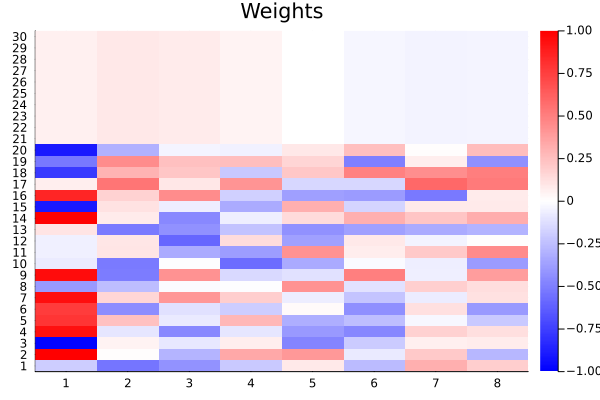

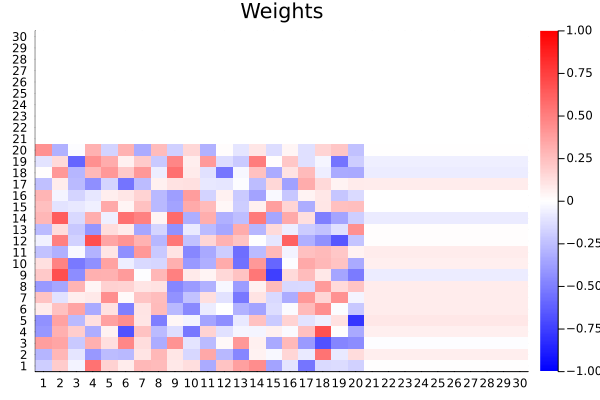

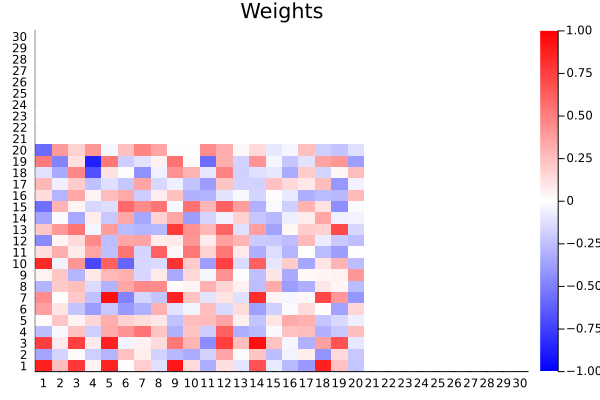

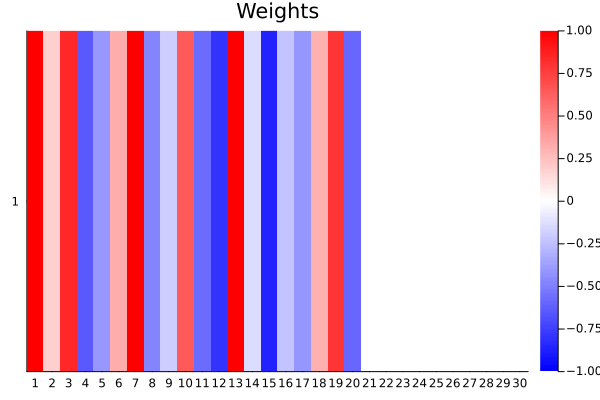

In [70]:
NN_Retrainer.plot_model_parameters(model)

In [71]:
model = nothing
BSON.@load "output_model.bson" model


In [72]:
model

Chain(
  Dense(8 => 10; bias=false),           # 80 parameters
  Dense(10 => 8, relu; bias=false),     # 80 parameters
  Dense(8 => 1; bias=false),            # 8 parameters
)                   # Total: 3 arrays, 168 parameters, 1.570 KiB.

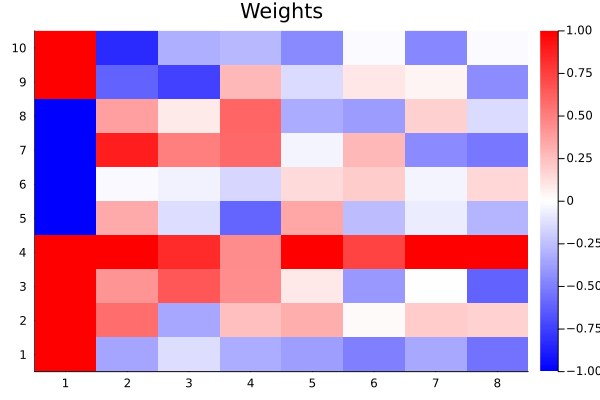

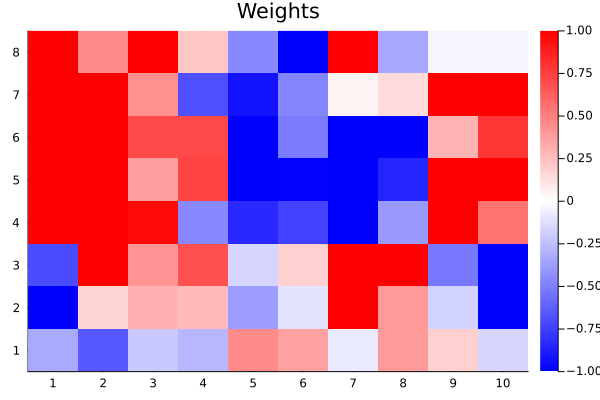

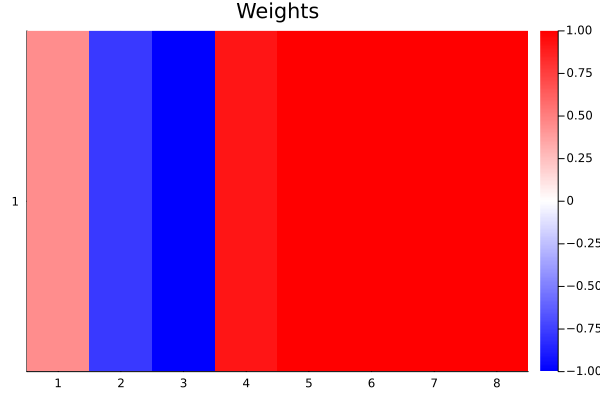

In [73]:
NN_Retrainer.plot_model_parameters(model)

# Testing

In [74]:
model = nothing
output_model = nothing

BSON.@load "output_model.bson" model
output_model = model
model = nothing
BSON.@load "model-iter-101.bson" model



mul = 1
n1 = size(model.layers[1].weight)[2]
n2 = size(output_model.layers[1].weight)[2]

failed_test_counter = 0
num_iters = 1000
for i in 1:num_iters
    input_vector1 = rand(n1) .* mul
    v_2 = rand(n2 - n1) .* mul
    input_vector2 = vcat(input_vector1, v_2)
    result1 = model(input_vector1)
    result2 = output_model(input_vector2)
    if abs(result1[1] - result2[1]) > 0.1
        # println("❌ Failed test!")
        # println("Input model result: $(result1[1])")
        # println("Output model result: $(result2[1])")
        # println("Difference: $(abs(result1[1] - result2[1]))")
        failed_test_counter += 1
    end
    mul *= -1
end

println("Percent of failed tests: $(failed_test_counter/num_iters)")


Percent of failed tests: 0.721


In [75]:
# One test
input_vector1 = rand(n1) .* mul
result1 = model(input_vector1)
result2 = output_model(input_vector1)
println("Input model result: $(result1[1])")
println("Output model result: $(result2[1])")

Input model result: 8.473923242738188
Output model result: 8.47939361105894


In [76]:
model

Chain(
  Dense(8 => 30; bias=false),           # 240 parameters
  Dense(30 => 30, relu; bias=false),    # 900 parameters
  Dense(30 => 30, relu; bias=false),    # 900 parameters
  Dense(30 => 1; bias=false),           # 30 parameters
)                   # Total: 4 arrays, 2_070 parameters, 16.516 KiB.

In [77]:
output_model

Chain(
  Dense(8 => 10; bias=false),           # 80 parameters
  Dense(10 => 8, relu; bias=false),     # 80 parameters
  Dense(8 => 1; bias=false),            # 8 parameters
)                   # Total: 3 arrays, 168 parameters, 1.570 KiB.

# Fine tuning

In [78]:
output_model = NN_Retrainer.fine_tune_training!(output_model, 16.0, 2000000, 0.00001, 100000)

Iteration 100000: loss = 12.80625341911632
Iteration 200000: loss = 22.187938821044828
Iteration 300000: loss = 8.951470305067852
Iteration 400000: loss = 16.18144765370136
Iteration 500000: loss = 2.0735099762173914
Iteration 600000: loss = 1.411901491507482
Iteration 700000: loss = 7.89914449863921
Iteration 800000: loss = 1.5186612498391672
Iteration 900000: loss = 0.060783458036161274
Iteration 1000000: loss = 14.060474648742497
Iteration 1100000: loss = 0.6106102056670016
Iteration 1200000: loss = 0.736816977146425
Iteration 1300000: loss = 0.00700494013059265
Iteration 1400000: loss = 36.096208261907265
Iteration 1500000: loss = 4.694217558202273
Iteration 1600000: loss = 5.9530249321673665
Iteration 1700000: loss = 1.5715715478115049
Iteration 1800000: loss = 9.012238233502034
Iteration 1900000: loss = 39.15527790836467
Iteration 2000000: loss = 4.0682833390584925


Chain(
  Dense(8 => 10; bias=false),           # 80 parameters
  Dense(10 => 8, relu; bias=false),     # 80 parameters
  Dense(8 => 1; bias=false),            # 8 parameters
)                   # Total: 3 arrays, 168 parameters, 1.570 KiB.

In [79]:
output_model

Chain(
  Dense(8 => 10; bias=false),           # 80 parameters
  Dense(10 => 8, relu; bias=false),     # 80 parameters
  Dense(8 => 1; bias=false),            # 8 parameters
)                   # Total: 3 arrays, 168 parameters, 1.570 KiB.

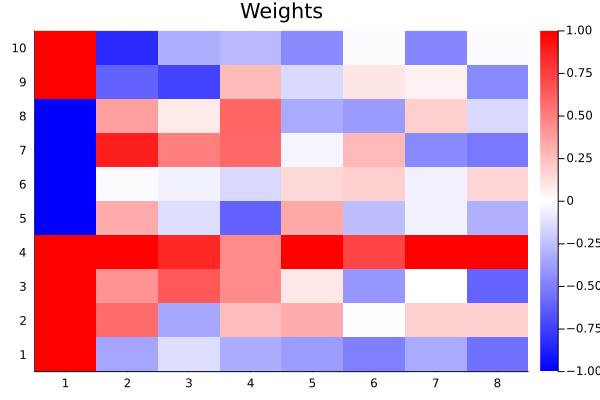

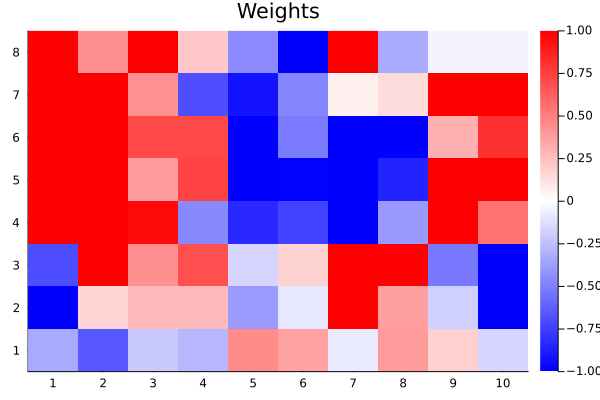

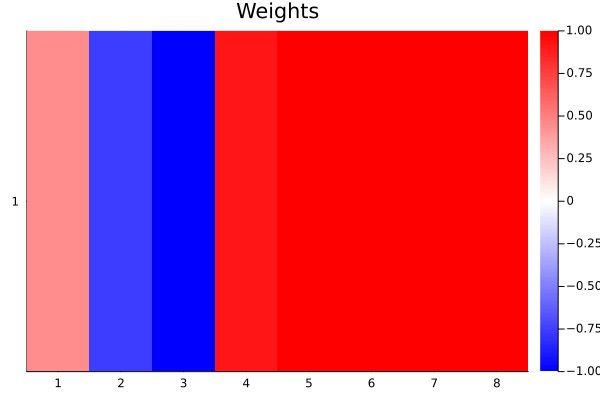

In [80]:
NN_Retrainer.plot_model_parameters(output_model)

In [81]:
model = nothing
BSON.@load "model-iter-101.bson" model

mul = 16
n1 = size(model.layers[1].weight)[2]

failed_test_counter = 0
num_iters = 1000
for i in 1:num_iters
    input_vector1 = rand(n1) .* mul
    result1 = model(input_vector1)
    result2 = output_model(input_vector1)
    if abs(result1[1] - result2[1]) > 0.1
        failed_test_counter += 1
    end
    mul *= -1
end

println("Percent of failed tests: $(failed_test_counter/num_iters)")


Percent of failed tests: 0.972
